In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
#define well
#variables
L = 1
v = 0.6 
c = [1, 1, 1, 1, 1] 
#c = [1]*50 # 50 modes with equal weight

#fixed params
Nm = len(c)
n1 = list(range(1, Nm + 1))
N = sum(c)
x = np.linspace(0, L, 501)

In [3]:
def P(n, x, t): 
    return np.sin(np.pi*n*x/L)*np.cos(np.pi*v*n*t/L)

def U(x, t): 
    return np.sum([c[i]*P(n1[i], x, t)/N for i in range(len(n1))], axis = 0)

Text(0.5, 1.0, '$t = 2$ s')

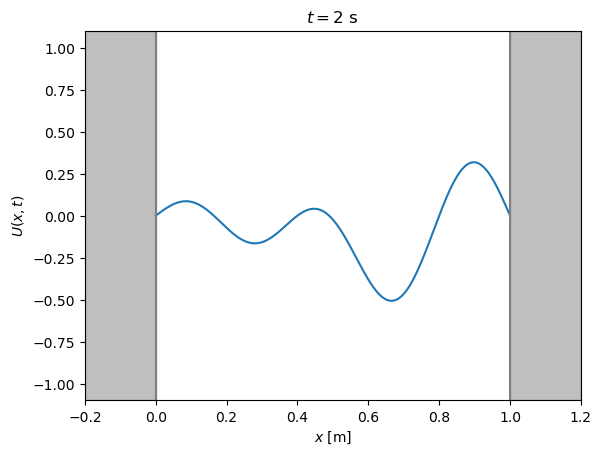

In [4]:
t = 2
plt.plot(x, U(x, t))
plt.ylim(-1.1, 1.1)
plt.xlim(-L/5, L + L/5)
plt.vlines([0, L], -1.1, 1.1, color = 'gray')
plt.axvspan(-L/5, 0, alpha = 0.5, color = 'gray')
plt.axvspan(L, L+L/5, alpha = 0.5, color = 'gray')
plt.xlabel(f'$x$ [m]')
plt.ylabel(f'$U(x, t)$')
plt.title(f'$t = {t}$ s')


In [5]:
# animate 
from matplotlib.animation import FuncAnimation 
from IPython.display import HTML 

fig, ax = plt.subplots(figsize = (6, 4))
time = np.linspace(0, 5, 101)

def animate(t): 
    ax.cla()
    ax.plot(x, U(x, time[t]))
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(-L/5, L + L/5)
    ax.vlines([0, L], -1.1, 1.1, color = 'gray')
    ax.axvspan(-L/5, 0, alpha = 0.5, color = 'gray')
    ax.axvspan(L, L+L/5, alpha = 0.5, color = 'gray')

anim = FuncAnimation(fig, animate, frames = len(time), interval = 70, blit = False)
plt.close()
HTML(anim.to_jshtml())